In [55]:
import pandas as pd
import numpy as np
import cv2 as cv
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
import itertools
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import seaborn as sns
import xgboost as xgb
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

1. Wczytanie zbioru danych

In [114]:
data= pd.read_csv("pred_house.csv",encoding="utf-8")
print(data.info())
print(data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 85 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   area                                                    3472 non-null   float64
 1   room_num                                                3472 non-null   float64
 2   floor                                                   3472 non-null   float64
 3   total_floor                                             3472 non-null   float64
 4   year_built                                              3472 non-null   float64
 5   poddasze                                                3472 non-null   float64
 6   dish_washer(zmywarka)                                   3472 non-null   float64
 7   fridge(lodówka)                                         3472 non-null   float64
 8   furniture(meble)                      

,area,room_num,floor,total_floor,year_built,poddasze,dish_washer(zmywarka),fridge(lodówka),furniture(meble),oven(piekarnik),...,district_ Warszawa,district_ Wawer,district_ Wesoła,district_ Wilanów,district_ Wola,district_ Włochy,district_ mazowieckie,district_ Śródmieście,district_ Żoliborz,gross_price
0,37.0,2.0,1.0,4.000000,2001.453488,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2435.244186
1,38.0,2.0,1.0,5.802326,2020.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2175.000000
2,57.0,3.0,1.0,15.000000,1984.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3300.000000
3,63.0,2.0,4.0,5.000000,2005.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2585.046512
4,65.0,3.0,3.0,4.000000,1938.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3424.918605


2. Analiza i czyszczenie zbioru danych

In [68]:
data.columns

Index(['area', 'room_num', 'floor', 'total_floor', 'year_built', 'poddasze',
       'dish_washer(zmywarka)', 'fridge(lodówka)', 'furniture(meble)',
       'oven(piekarnik)', 'stove(kuchenka)', 'tv_set(telewizor)',
       'washer(pralka)', 'secure_doors/windows(drzwi/okna_antywłamaniowe)',
       'intercom/videophone(domofon/wideofon)',
       'monitoring/security(monitoring/ochrona)',
       'closed_area(teren_zamknięty)', 'balcony(balkon)', 'basement(piwnica)',
       'garage/parking_space(garaż/miejsce_parkingowe)',
       'alarm system(system alarmowy)',
       'only_for_non-smokers(tylko_dla_niepalących)',
       'anti-burglary blinds(rolety antywłamaniowe)', 'elevator(winda)',
       'separate kitchen(oddzielna kuchnia)', 'internet',
       'cable TV(telewizja kablowa)', 'telephone(telefon)',
       'air conditioning(klimatyzacja)',
       'available for students(wynajmę również studentom)',
       'utility room(pom. użytkowe)', 'terrace(taras)',
       'two-level(dwupoziomowe)', 

In [115]:
def f1():
    data["Białołęka"] = data["district_ Białołęka"].map({0:0, 1: 2})
    data["Bielany"] = data["district_ Bielany"].map({0:0, 1: 3})
    data["Centrum"] = data["district_ Centrum"].map({0:0, 1: 4})
    data["Mokotów"] = data["district_ Mokotów"].map({0:0, 1: 5})
    data["Ochota"] = data["district_ Ochota"].map({0:0, 1: 6})
    data["Praga-Południe"] = data["district_ Praga-Południe"].map({0:0, 1: 7})
    data["Praga-Północ"] = data["district_ Praga-Północ"].map({0:0, 1: 8})
    data["Targówek"] = data["district_ Targówek"].map({0:0, 1: 9})
    data["Ursus"] = data["district_ Ursus"].map({0:0, 1: 10})
    data["Ursynów"] = data["district_ Ursynów"].map({0:0, 1: 11})
    data["Wawer"] = data["district_ Wawer"].map({0:0, 1: 12})
    data["Wilanów"] = data["district_ Wilanów"].map({0:0, 1: 13})
    data["Wola"] = data["district_ Wola"].map({0:0, 1: 14})
    data["Włochy"] = data["district_ Włochy"].map({0:0, 1: 15})
    data["Śródmieście"] = data["district_ Śródmieście"].map({0:0, 1: 16})
    data["Żoliborz"] = data["district_ Żoliborz"].map({0:0, 1: 17})

f1()


In [116]:
data['district']=data['Białołęka']+data['Bielany']+data['Centrum']+data['district_ Bemowo']+data['Mokotów']+data['Ochota']+data['Praga-Południe']+data['Praga-Północ']+data['Targówek']+data['Ursus']+data['Ursynów']+data['Wawer']+data['Wilanów']+data['Wola']+data['Włochy']+data['Śródmieście']+data['Żoliborz']


In [117]:
data['Dzielnica'] = data['district'].map({1: 'Bemowo', 2: 'Białołęka', 3: 'Bielany',4: 'Centrum', 5: 'Mokotów', 6: 'Ochota',7: 'Praga-Południe', 8: 'Praga-Północ', 9: 'Targówek',10: 'Ursus', 11: 'Ursynów', 12: 'Wawer', 13: 'Wilanów', 14: 'Wola',15: 'Włochy', 16: 'Śródmieście', 17: 'Żoliborz'})

In [118]:
data=data[['area', 'room_num', 'floor', 'total_floor', 'year_built',
       'dish_washer(zmywarka)', 
       'tv_set(telewizor)',
       'washer(pralka)', 
       'balcony(balkon)', 'basement(piwnica)',
       'elevator(winda)',
       'internet',
       'available for students(wynajmę również studentom)',
       'two-level(dwupoziomowe)', 'garden(ogródek)',
       'district',
      'gross_price']]

In [119]:

m1 = data['district'] == 0
m2 = data['floor'] == 15
m3 = data['area'] == 3
m4 = data['floor'] ==  0
mo=[m1,m2,m3, m4]
for m in mo:
    data = data.drop(data.loc[m].index)

In [74]:
data.head()

,area,room_num,floor,total_floor,year_built,dish_washer(zmywarka),tv_set(telewizor),washer(pralka),balcony(balkon),basement(piwnica),elevator(winda),internet,available for students(wynajmę również studentom),two-level(dwupoziomowe),garden(ogródek),district,gross_price
0,37.0,2.0,1.0,4.000000,2001.453488,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,2435.244186
1,38.0,2.0,1.0,5.802326,2020.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,2175.000000
2,57.0,3.0,1.0,15.000000,1984.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3300.000000
3,63.0,2.0,4.0,5.000000,2005.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2585.046512
4,65.0,3.0,3.0,4.000000,1938.000000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,3424.918605


In [90]:
data.columns


Index(['area', 'room_num', 'floor', 'total_floor', 'year_built',
       'dish_washer(zmywarka)', 'tv_set(telewizor)', 'washer(pralka)',
       'balcony(balkon)', 'basement(piwnica)', 'elevator(winda)', 'internet',
       'available for students(wynajmę również studentom)',
       'two-level(dwupoziomowe)', 'garden(ogródek)', 'district',
       'gross_price'],
      dtype='object')

In [120]:
def f4():
    data.rename(columns={'dish_washer(zmywarka)': 'dish_washer'}, inplace=True)
    data.rename(columns={'tv_set(telewizor)': 'tv_set'}, inplace=True)
    data.rename(columns={'washer(pralka)': 'washer'}, inplace=True)
    data.rename(columns={'balcony(balkon)': 'balcony'}, inplace=True)
    data.rename(columns={'basement(piwnica)': 'basement'}, inplace=True)
    data.rename(columns={'elevator(winda)': 'elevator'}, inplace=True)
    data.rename(columns={'available for students(wynajmę również studentom)': 'available_for_students'}, inplace=True)
    data.rename(columns={'two-level(dwupoziomowe)': 'two_level'}, inplace=True)
    data.rename(columns={'garden(ogródek)': 'garden'}, inplace=True)

f4()

In [121]:
data.head()

,area,room_num,floor,total_floor,year_built,dish_washer,tv_set,washer,balcony,basement,elevator,internet,available_for_students,two_level,garden,district,gross_price
0,37.0,2.0,1.0,4.000000,2001.453488,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,2435.244186
1,38.0,2.0,1.0,5.802326,2020.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,2175.000000
2,57.0,3.0,1.0,15.000000,1984.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3300.000000
3,63.0,2.0,4.0,5.000000,2005.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2585.046512
4,65.0,3.0,3.0,4.000000,1938.000000,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,3424.918605


3. Wykresy

In [78]:
data.corr()

,area,room_num,floor,total_floor,year_built,dish_washer,tv_set,washer,balcony,basement,elevator,internet,available_for_students,two_level,garden,district,gross_price
area,1.000000,0.787112,-0.013585,-0.062341,0.003603,0.305206,0.069582,-0.046956,0.205084,0.031536,0.043699,0.049050,-0.108460,0.239709,0.052310,-0.043453,0.772320
room_num,0.787112,1.000000,-0.001875,-0.029135,-0.006563,0.282153,0.034530,-0.038345,0.211493,0.065729,0.028003,0.015201,-0.063772,0.146609,0.023141,-0.058509,0.619436
floor,-0.013585,-0.001875,1.000000,0.617647,0.017085,-0.031314,0.045261,0.004071,0.093294,-0.044496,0.283483,-0.004611,0.006546,0.008053,-0.170697,0.033762,0.051787
total_floor,-0.062341,-0.029135,0.617647,1.000000,0.018481,-0.038464,0.058114,0.005901,0.056112,-0.036103,0.353172,-0.002230,0.042593,-0.047430,-0.101376,0.089840,0.042458
year_built,0.003603,-0.006563,0.017085,0.018481,1.000000,-0.018553,-0.017582,-0.073132,-0.023377,-0.030375,-0.002059,-0.023705,-0.010534,-0.005002,-0.001765,0.011568,0.000202
dish_washer,0.305206,0.282153,-0.031314,-0.038464,-0.018553,1.000000,0.182817,0.152862,0.186897,-0.071350,0.185206,0.118657,-0.107825,0.063151,0.057554,0.001254,0.369289
tv_set,0.069582,0.034530,0.045261,0.058114,-0.017582,0.182817,1.000000,0.152221,0.095569,-0.074897,0.125929,0.133895,-0.080360,0.016949,0.021986,0.092114,0.156497
washer,-0.046956,-0.038345,0.004071,0.005901,-0.073132,0.152862,0.152221,1.000000,0.126169,0.007429,0.110679,0.096754,0.041033,-0.039577,0.011784,-0.019367,-0.055548
balcony,0.205084,0.211493,0.093294,0.056112,-0.023377,0.186897,0.095569,0.126169,1.000000,-0.016968,0.269838,0.029991,-0.078843,0.007363,-0.139504,-0.074866,0.153268
basement,0.031536,0.065729,-0.044496,-0.036103,-0.030375,-0.071350,-0.074897,0.007429,-0.016968,1.000000,-0.096077,0.011672,0.034464,0.026856,0.001284,-0.022961,-0.010300


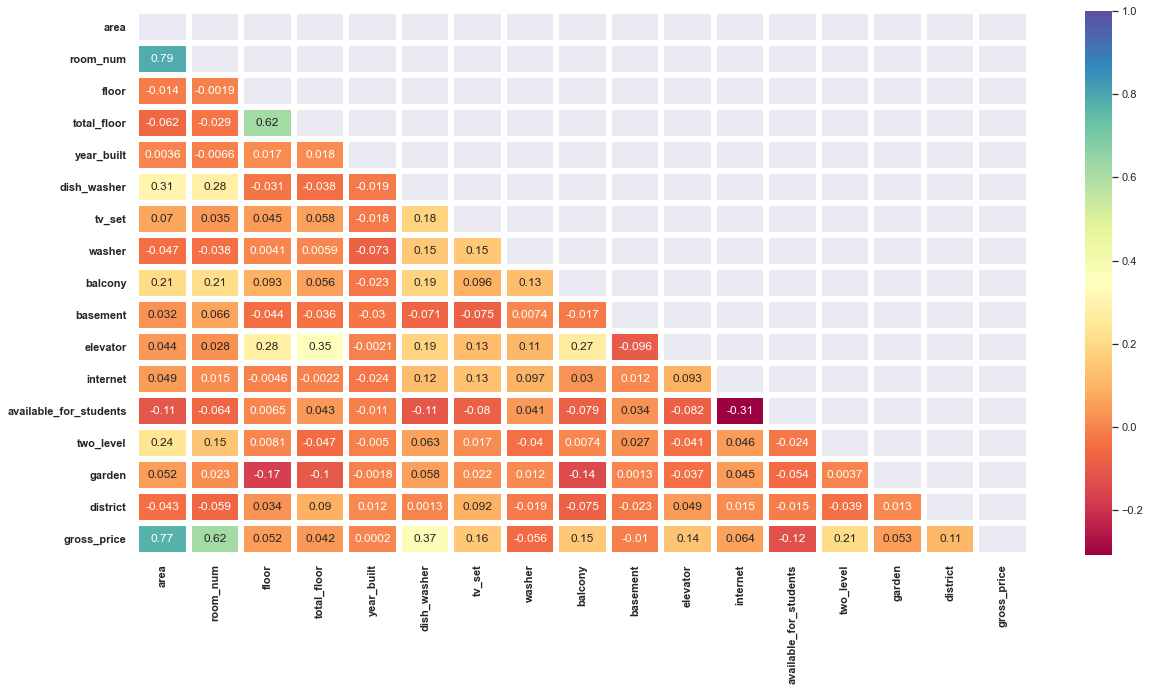

In [80]:
def corr():
    correlation_matrix = data.corr()
    sns.set(rc={'figure.figsize':(20,10)}) 
    plt.setp(plt.gca().get_xticklabels(), weight='bold')
    plt.setp(plt.gca().get_yticklabels(), weight='bold')
    mask = np.triu(np.ones_like(correlation_matrix), k=0) 
    sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
    pass
corr()

In [81]:
data.describe()

,area,room_num,floor,total_floor,year_built,dish_washer,tv_set,washer,balcony,basement,elevator,internet,available_for_students,two_level,garden,district,gross_price
count,3374.000000,3374.000000,3374.000000,3374.000000,3374.000000,3374.000000,3374.000000,3374.000000,3374.000000,3374.000000,3374.000000,3374.00000,3374.000000,3374.000000,3374.000000,3374.000000,3374.000000
mean,45.435092,1.983106,3.539884,6.559163,2010.782554,0.625074,0.475993,0.957024,0.683758,0.228512,0.666864,0.45495,0.152341,0.009484,0.053942,8.988145,2747.763630
std,17.429161,0.741397,2.615306,3.346119,358.912780,0.484176,0.499497,0.202832,0.465077,0.419936,0.471404,0.49804,0.359405,0.096939,0.225937,4.884480,932.007125
min,10.000000,1.000000,1.000000,1.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,581.418605
25%,35.000000,2.000000,1.000000,4.000000,1991.883721,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,2200.000000
50%,42.000000,2.000000,3.000000,6.000000,2004.122093,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,8.000000,2588.604651
75%,53.000000,2.000000,5.000000,8.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,14.000000,3000.000000
max,220.000000,6.000000,11.000000,30.000000,20202.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,17.000000,11500.000000


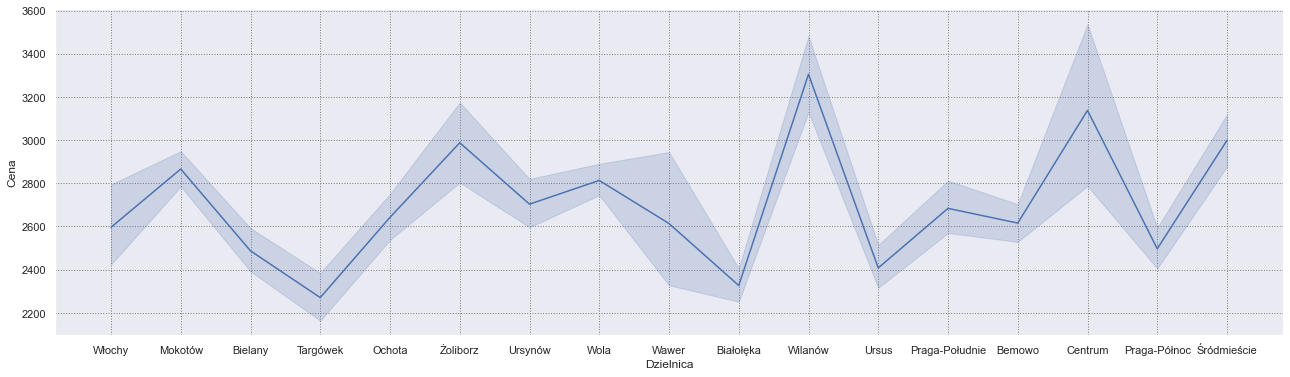

In [106]:
def w4():
    plt.figure(figsize=(22,6))
    plt.grid(linestyle="dotted",color='black')
    sns.lineplot(data=data,x="Dzielnica",y="gross_price")
    plt.ylabel("Cena")
    plt.grid(linestyle="dotted",color='grey')
    plt.show()
w4()

Machine Learning :

In [122]:
X = data.drop(['gross_price'], axis=1)
y = data['gross_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)
print(' Train : ', X_train.shape, y_train.shape,'\n', 'Test' , X_test.shape, y_test.shape)

 Train :  (2699, 16) (2699,) 
 Test (675, 16) (675,)


1. LinearRegression

In [123]:

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
y_pred=model_lr.predict(X_test)
print("wyniki medelu LinearRegression() :")
print('Score R2 : ',model_lr.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
print('RMSE : ',rmse)
print('MAE', mae)

wyniki medelu LinearRegression() :
Score R2 :  0.6333574474130629
RMSE :  597.7949232673418
MAE 382.0019485746573


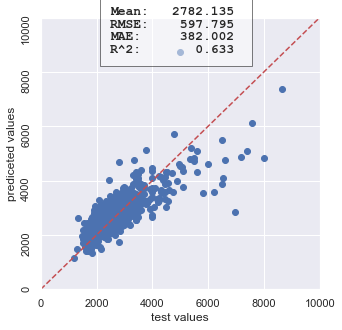

In [128]:
def w1():
       
        max = 10000

        sns.set(rc={'figure.figsize':(5,5)})
        plt.xlim(0,10000)
        plt.ylim(0,max)
        plt.scatter(y_test,y_pred)
        plt.yticks(rotation="90")
        plt.xlabel("test values")
        plt.ylabel("prediceted values")
        plt.plot([0,max],[0,max],'r--')

        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
                #plt.title(str(title).upper(), font={'size':16})
        t1, t2, t3, t4 = "Mean:", "RMSE:", "MAE:", "R^2:"
        s1, s2, s3, s4 = format(y_pred.mean(),'.3f'), format(rmse,'.3f'), format(mae,'.3f'), format(r2,'.3f')
        plt.annotate(f"{t1} {s1:>10} \n{t2} {s2:>10} \n{t3} {s3:>11} \n{t4} {s4:>11}", [2500,max*.87],
                                font={'size':13, 'family':'courier new', 'weight':'bold'},
                                bbox={'facecolor': 'white', 'edgecolor' : 'black', 'alpha': 0.5, 'pad': 10})
        plt.title="LinearRegression"
        plt.show()
w1()

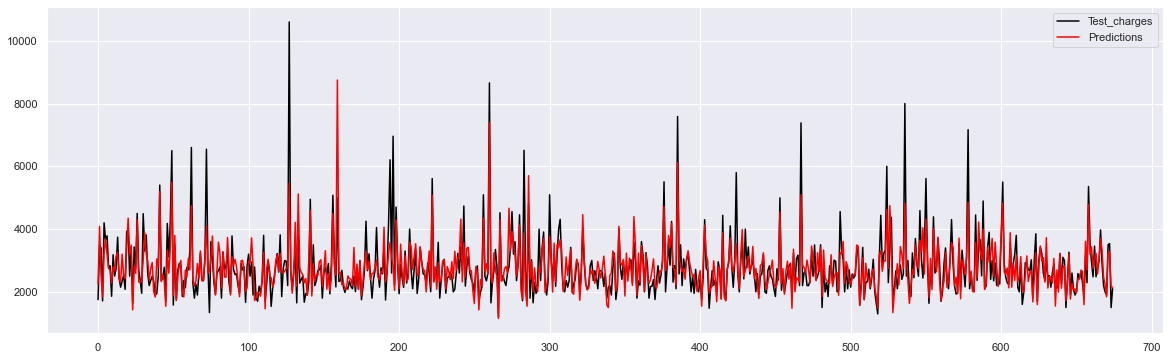

In [129]:
def pred_plot():
    plt.figure(figsize=(20,6))
    plt.plot(np.arange(len(y_test)), y_test, color='black', label='Test_charges')
    plt.plot(np.arange(len(y_pred)), y_pred, color='red' ,label='Predictions')
    plt.legend()
    plt.title="LinearRegression"
    plt.show()
pred_plot()

2. DecisionTreeRegressor

In [130]:

model_dtr=DecisionTreeRegressor()
model_dtr
model_dtr.fit(X_train,y_train)
y_pred=model_dtr.predict(X_test)
print("wyniki medelu DecisionTreeRegressor() :")
print('Score R2 : ',model_dtr.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
print('RMSE : ',rmse)
print('MAE', mae)

wyniki medelu DecisionTreeRegressor() :
Score R2 :  0.4355089051786116
RMSE :  741.7530420747581
MAE 479.41510766580535


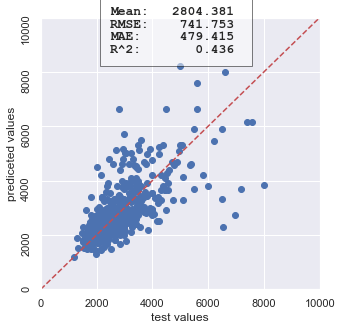

In [131]:
w1()

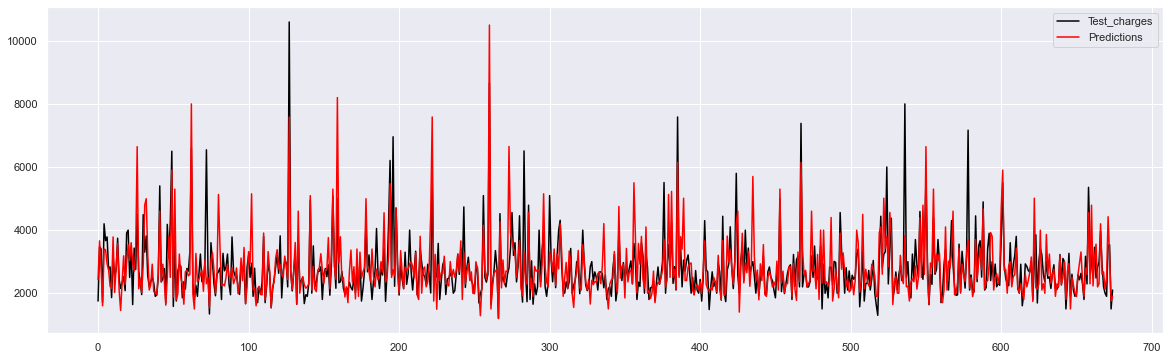

In [132]:

pred_plot()

3. RandomForestRegressor

In [155]:


model_rfr=RandomForestRegressor()
model_rfr
model_rfr.fit(X_train,y_train)
y_pred=model_rfr.predict(X_test)
print("Wynik medelu RandomForestRegressor() :")
print('Score R2 : ',model_rfr.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
print('RMSE : ',rmse)
print('MAE', mae)

Wynik medelu RandomForestRegressor() :
Score R2 :  0.7072923892104149
RMSE :  534.1310143000718
MAE 332.37132598334773


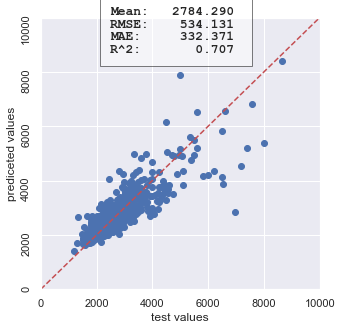

In [156]:
w1()

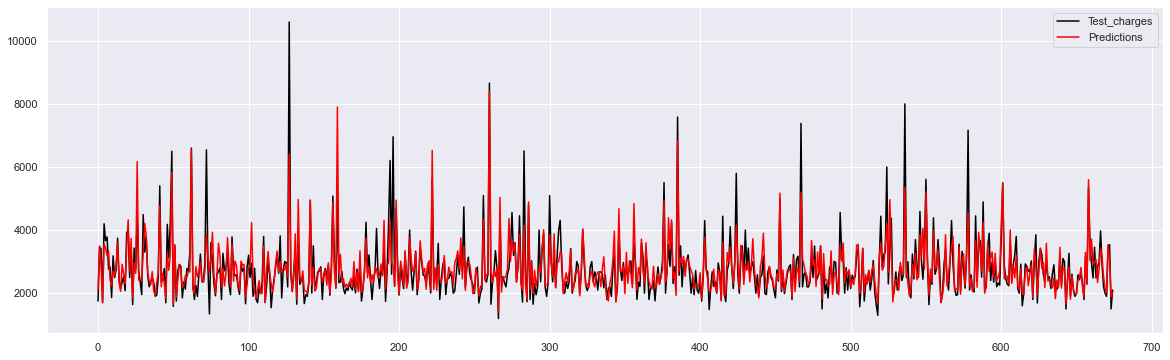

In [157]:
pred_plot()

Dobranie najlepszych hiperparametrów dla RandomForestRegressor

In [243]:

param_grid = {
        'n_estimators': [ 50, 100, 150,200], 
        'max_depth': [ 50, 75, 100, 150, 200, 250],
        'min_samples_split': [ 5, 10,15,20]
    }
l5=[]
grid_search = GridSearchCV(model_rfr, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.fit(X_train, y_train)
y_predgs=grid_search.predict(X_test)
grid_search.score(X_train,y_train)
grid_search.score(X_test,y_test)
r2 = r2_score(y_test, y_predgs)
score=grid_search.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predgs))
mae=mean_absolute_error(y_test,y_predgs)
print('================================')
print('Score : ', score)
print('r2:  ', r2)
print('RMSE:  ', rmse)
print('MAE', mae)
print('best_params: ',grid_search.best_params_)
print('================================')
l5.append(['Score : ', score,'r2:  ', r2,'RMSE :  ', rmse,'MAE :', mae,'best_params: ',grid_search.best_params_, 'param_estimator',grid_search.best_estimator_])
print(l5)



Score :  0.7351517811153653
r2:   0.7351517811153653
RMSE:   498.7110313545574
MAE 328.73851735028705
best_params:  {'max_depth': 250, 'min_samples_split': 15, 'n_estimators': 150}
[['Score : ', 0.7351517811153653, 'r2:  ', 0.7351517811153653, 'RMSE :  ', 498.7110313545574, 'MAE :', 328.73851735028705, 'best_params: ', {'max_depth': 250, 'min_samples_split': 15, 'n_estimators': 150}, 'param_estimator', RandomForestRegressor(max_depth=250, min_samples_split=15, n_estimators=150)]]


4. XGBRegressor

In [161]:

model_x1=xgb.XGBRegressor()
model_x1
model_x1.fit(X_train,y_train)
y_pred=model_x1.predict(X_test)
print("wyniki medelu XGBRegressor() :")
print('Score R2 : ',model_x1.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
print('RMSE : ',rmse)
print('MAE', mae)

wyniki medelu XGBRegressor() :
Score R2 :  0.7080839347158054
RMSE :  533.4083217500455
MAE 340.08454776156066


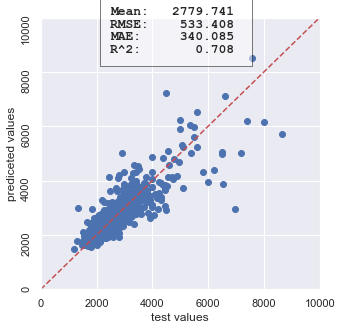

In [162]:
w1()

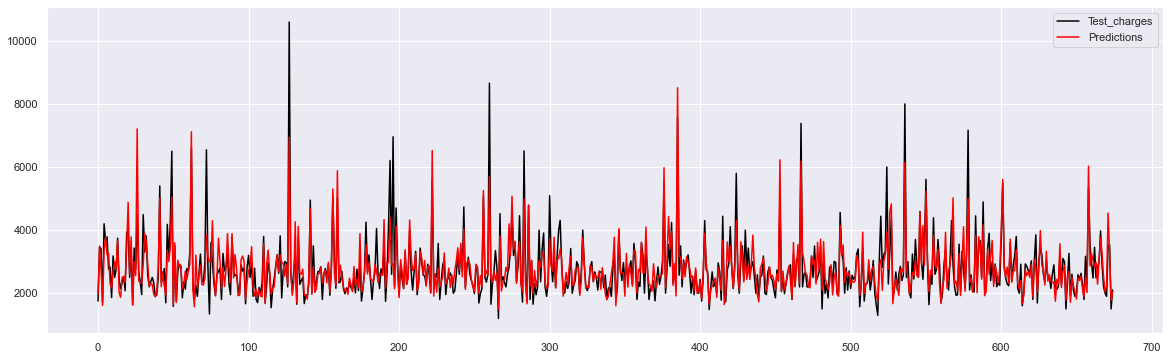

In [163]:
pred_plot()

Dobranie najlepszych hiperparametrów dla XGBRegressor

In [148]:
#RANDOMIZEDSEARCHCV - 'dart','gbtree'
params={
    "learning_rate" : [0.02,0.05,0.1,0.15,0.2,0.3],
    "max_depth" : [3,4,5,6,8, 10] ,
    "colsample_bytree" : [0.5,0.7],
    "n_estimators" : [7,15,30,50,60,70,60,90,100,150,250,300],
    'gamma' : [0.01,0.05,0.1],
    
}
l9=[]
boo=['dart','gbtree']
for boost in boo:
    model_x3=xgb.XGBRegressor(booster=boost)
    random_search=RandomizedSearchCV(model_x3, param_distributions=params,random_state=42)
    random_search.fit(X_train, y_train)
    y_pred=random_search.predict(X_test)
    print('Score R2 : ',boost,random_search.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    print('RMSE : ',boost,rmse)
    print('MAE',boost, mae)
    print('best_params: ',random_search.best_params_)
    print("================")
    l9.append(['r2:  ', random_search.score(X_test,y_test),'RMSE :  ', rmse,'MAE :', mae,'best_params: ',random_search.best_params_, 'param_estimator',random_search.best_estimator_])

Score R2 :  dart 0.7357386990104176
RMSE :  dart 507.5134694593272
MAE dart 314.93677760870884
best_params:  {'n_estimators': 60, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.01, 'colsample_bytree': 0.7}
Score R2 :  gbtree 0.7490284820152908
RMSE :  gbtree 494.587353481621
MAE gbtree 311.0030406673934
best_params:  {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.5}


In [149]:
l9

[['r2:  ',
  0.7357386990104176,
  'RMSE :  ',
  507.5134694593272,
  'MAE :',
  314.93677760870884,
  'best_params: ',
  {'n_estimators': 60,
   'max_depth': 6,
   'learning_rate': 0.1,
   'gamma': 0.01,
   'colsample_bytree': 0.7},
  'param_estimator',
  XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
               gamma=0.01, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=60, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
               validate_parameters=1, verbosity=None)],
 ['r2:  ',
  0.7490284820152908,
  'RMSE :  ',
  494.587353481621,
  'MAE :',
  311.0030406673934,
  '

In [167]:
model_x2=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
               gamma=0.1, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.15, max_delta_step=0,
               max_depth=4, min_child_weight=1,
               monotone_constraints='()', n_estimators=50, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
               validate_parameters=1, verbosity=None)
model_x2
model_x2.fit(X_train,y_train)
y_pred=model_x2.predict(X_test)
print("Wyniki medelu XGBRegressor() z dobranymi hiperparametrami:")
print('Score R^2 : ',model_x2.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
print('RMSE : ',rmse)
print('MAE', mae)

Wyniki medelu XGBRegressor() z dobranymi hiperparametrami:
Score R^2 :  0.7490284820152908
RMSE :  494.587353481621
MAE 311.0030406673934


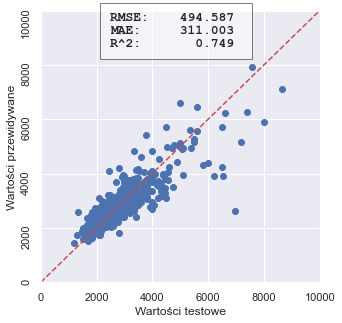

In [183]:
def w4():
       
        max = 10000

        sns.set(rc={'figure.figsize':(5,5)})
        plt.xlim(0,10000)
        plt.ylim(0,max)
        plt.scatter(y_test,y_pred)
        plt.yticks(rotation="90")
        plt.xlabel("Wartości testowe")
        plt.ylabel("Wartości przewidywane")
        plt.plot([0,max],[0,max],'r--')

        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
                #plt.title(str(title).upper(), font={'size':16})
        t1, t2, t3, t4 = "Mean:", "RMSE:", "MAE:", "R^2:"
        s2, s3, s4 =  format(rmse,'.3f'), format(mae,'.3f'), format(r2,'.3f')
        plt.annotate(f"{t2} {s2:>10} \n{t3} {s3:>11} \n{t4} {s4:>11}", [2500,max*.87],
                                font={'size':13, 'family':'courier new', 'weight':'bold'},
                                bbox={'facecolor': 'white', 'edgecolor' : 'black', 'alpha': 0.5, 'pad': 10})
     
        plt.show()
w4()

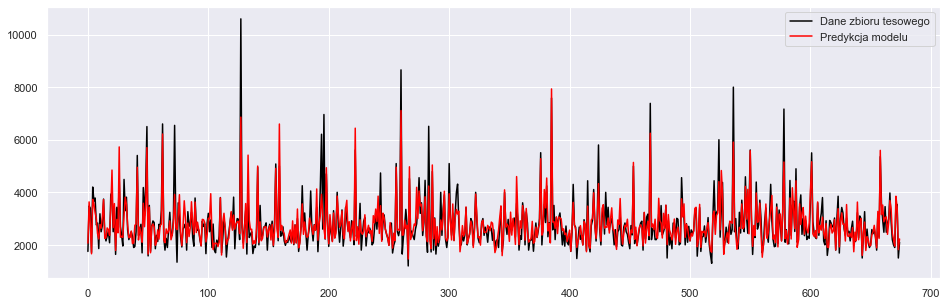

In [180]:
def pred_plot():
    plt.figure(figsize=(16,5))
    plt.plot(np.arange(len(y_test)), y_test, color='black', label=('Dane zbioru tesowego'))
    plt.plot(np.arange(len(y_pred)), y_pred, color='red' ,label='Predykcja modelu')
    plt.legend()

    plt.show()
pred_plot()

In [34]:
param_grid = {"max_depth" : [3,4,5,6,8] ,
              "max_features": [3,4,5,6,8],
              "ccp_alpha" : [0, 0.05, 0.1, 0.15],
              "n_estimators" : [7,15,30,50,70,100,150,250],
            }
rft=RandomForestRegressor()
l2=[]
gs = GridSearchCV(estimator=rft, param_grid=param_grid)
gs.fit(X_train, y_train)
y_predgs=gs.predict(X_test)
gs.score(X_train,y_train)
gs.score(X_test,y_test)
r2 = r2_score(y_test, y_predgs)
score=gs.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predgs))
mae=mean_absolute_error(y_test,y_predgs)
print('================================')
print('Score : ', score)
print('r2:  ', r2)
print('RMSE:  ', rmse)
print('MAE', mae)
print('best_params: ',gs.best_params_)
print('================================')
l2.append(['Score : ', score,'r2:  ', r2,'RMSE :  ', rmse,'MAE :', mae,'best_params: ',gs.best_params_, 'param_estimator',gs.best_estimator_])
print(l2)

Score :  0.7181185809039432
r2:   0.7181185809039432
RMSE:   524.1601659016501
MAE 330.5976673902296
best_params:  {'ccp_alpha': 0.1, 'max_depth': 8, 'max_features': 8, 'n_estimators': 70}
[['Score : ', 0.7181185809039432, 'r2:  ', 0.7181185809039432, 'RMSE :  ', 524.1601659016501, 'MAE :', 330.5976673902296, 'best_params: ', {'ccp_alpha': 0.1, 'max_depth': 8, 'max_features': 8, 'n_estimators': 70}, 'param_estimator', RandomForestRegressor(ccp_alpha=0.1, max_depth=8, max_features=8,
                      n_estimators=70)]]


Zapisanie modelu i test

In [170]:
import pickle
filename='test'
pickle.dump(model_x1,open(filename,'wb'))

In [171]:
x = {
    "area": 55,
    "room_num": 3,
    "floor": 3,
    "total_floor": 10,
    "year_built": 2000,
    "dish_washer": 0,
    "tv_set": 1,
    "washer": 1,
    "balcony": 0,
    "basement": 1,
    "elevator": 1,
    "internet": 0,
    "available_for_students": 1,
    "two_level": 0,
    "garden": 0,
    "district": 12
}

to_predict = {}
for key, value in x.items():
    to_predict[key] = [value]
to_predict

{'area': [55],
 'room_num': [3],
 'floor': [3],
 'total_floor': [10],
 'year_built': [2000],
 'dish_washer': [0],
 'tv_set': [1],
 'washer': [1],
 'balcony': [0],
 'basement': [1],
 'elevator': [1],
 'internet': [0],
 'available_for_students': [1],
 'two_level': [0],
 'garden': [0],
 'district': [12]}

In [172]:
model_x2.save_model("model_pred_house.json")

loaded_model = xgb.Booster()
loaded_model.load_model("C:\\Users\\patry\\OneDrive\\Pulpit\\inzzza\\model_pred_house.json")

test= [[55,3,2,10,2000,0,1,1,1,0,1,1,0,0,0,12]]
to_predict = xgb.DMatrix(pd.DataFrame(to_predict))

loaded_model.predict(to_predict)



array([2581.45], dtype=float32)